# 1. Data Exploration and Cleaning

### Data Importation and Selection

In [59]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# data can be found here: https://github.com/brandi-giuseppe/DataCourse/blob/main/Data/Enviromental/temperature.csv
filepath = 'data/temperature.csv'
df = pd.read_csv(filepath)

In [60]:
# set datetime as index
df['datetime'] = pd.to_datetime(df['datetime'])
# check no duplicated values are in our desired index
duplicate_dates = df[df['datetime'].duplicated()]
print(len(duplicate_dates))
df.set_index('datetime', inplace=True)

# only keep columns for Los Angeles, New York, Charlotte, and Chicago
cities_subset = ['Los Angeles', 'New York', 'Charlotte', 'Chicago']
df = df[cities_subset]


0


In [61]:
# print range of dates in a readable format and number of days and number of data points
print(pd.to_datetime(df.index.min()), pd.to_datetime(df.index.max()))
print(len(df.index))

# print number of data points per city
df.count()


2012-10-01 12:00:00 2017-11-30 00:00:00
45253


Los Angeles    45250
New York       44460
Charlotte      45250
Chicago        45250
dtype: int64

In [62]:
# do a sumif on number of days for each city where temperature is NA
df.isnull().sum()

Los Angeles      3
New York       793
Charlotte        3
Chicago          3
dtype: int64

DatetimeIndex(['2012-10-01 12:00:00', '2017-10-28 01:00:00',
               '2017-10-28 02:00:00', '2017-10-28 03:00:00',
               '2017-10-28 04:00:00', '2017-10-28 05:00:00',
               '2017-10-28 06:00:00', '2017-10-28 07:00:00',
               '2017-10-28 08:00:00', '2017-10-28 09:00:00',
               ...
               '2017-11-29 15:00:00', '2017-11-29 16:00:00',
               '2017-11-29 17:00:00', '2017-11-29 18:00:00',
               '2017-11-29 19:00:00', '2017-11-29 20:00:00',
               '2017-11-29 21:00:00', '2017-11-29 22:00:00',
               '2017-11-29 23:00:00', '2017-11-30 00:00:00'],
              dtype='datetime64[ns]', name='datetime', length=793, freq=None)
DatetimeIndex(['2012-10-01 12:00:00', '2013-03-11 07:00:00',
               '2013-03-11 08:00:00'],
              dtype='datetime64[ns]', name='datetime', freq=None)
DatetimeIndex(['2012-10-01 12:00:00', '2013-03-11 07:00:00',
               '2013-03-11 08:00:00'],
              dtype='datet

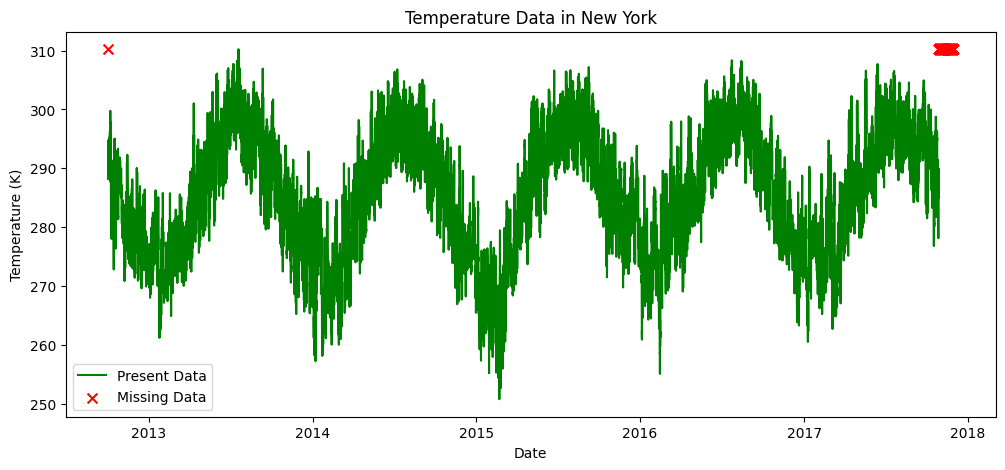

In [63]:
# Get timestamps where NY temperature is NA
timestamps_ny_na = df[df['New York'].isna()].index
timestamps_la_na = df[df['Los Angeles'].isna()].index
timestamps_chicago_na = df[df['Chicago'].isna()].index
timestamps_charlotte_na = df[df['Charlotte'].isna()].index

print(timestamps_ny_na)
print(timestamps_la_na)
print(timestamps_chicago_na)
print(timestamps_charlotte_na)

# Check for missing values in the New York column
missing_data = df['New York'].isnull()

# Plot the temperature data for New York
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['New York'], color='green', label='Present Data')

# Highlight missing data points
plt.scatter(df.index[missing_data], 
            [df['New York'].max()] * missing_data.sum(), 
            color='red', marker='x', s=50, label='Missing Data')

# Labels and title
plt.xlabel("Date")
plt.ylabel("Temperature (K)")
plt.title("Temperature Data in New York")
plt.legend()
plt.show()

### Data Cleaning and Preprocessing

In [64]:
# drop the first hour of data where all values are NA
df = df.iloc[1:]

# cut the df off where NY values drop off
df = df[df['New York'].notna()]

# Use linear interpolation to fill the two missing in other cities
df = df.interpolate(method='linear')

# double check that there are no more missing values
df.isna().sum()

Los Angeles    0
New York       0
Charlotte      0
Chicago        0
dtype: int64

### Summary Statistics

In [65]:
# print the summary statistics of the df rounded to 2 decimal places for presentation
df.describe().round(2)

,Los Angeles,New York,Charlotte,Chicago
count,44460.00,44460.00,44460.00,44460.00
mean,290.84,285.40,289.00,283.45
std,6.50,10.22,9.15,11.05
min,266.50,250.77,255.66,248.89
25%,286.33,277.37,282.15,275.20
50%,290.53,285.87,290.26,284.25
75%,295.13,293.76,295.85,292.41
max,315.47,310.24,310.90,308.48


# 2. Temperature Trend Analysis

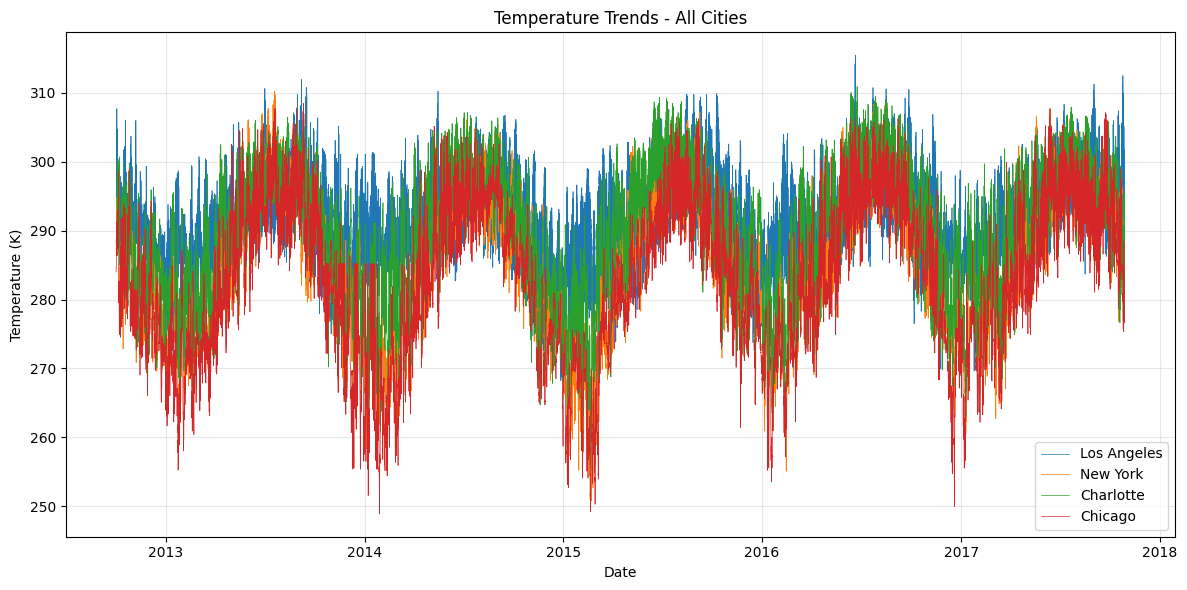

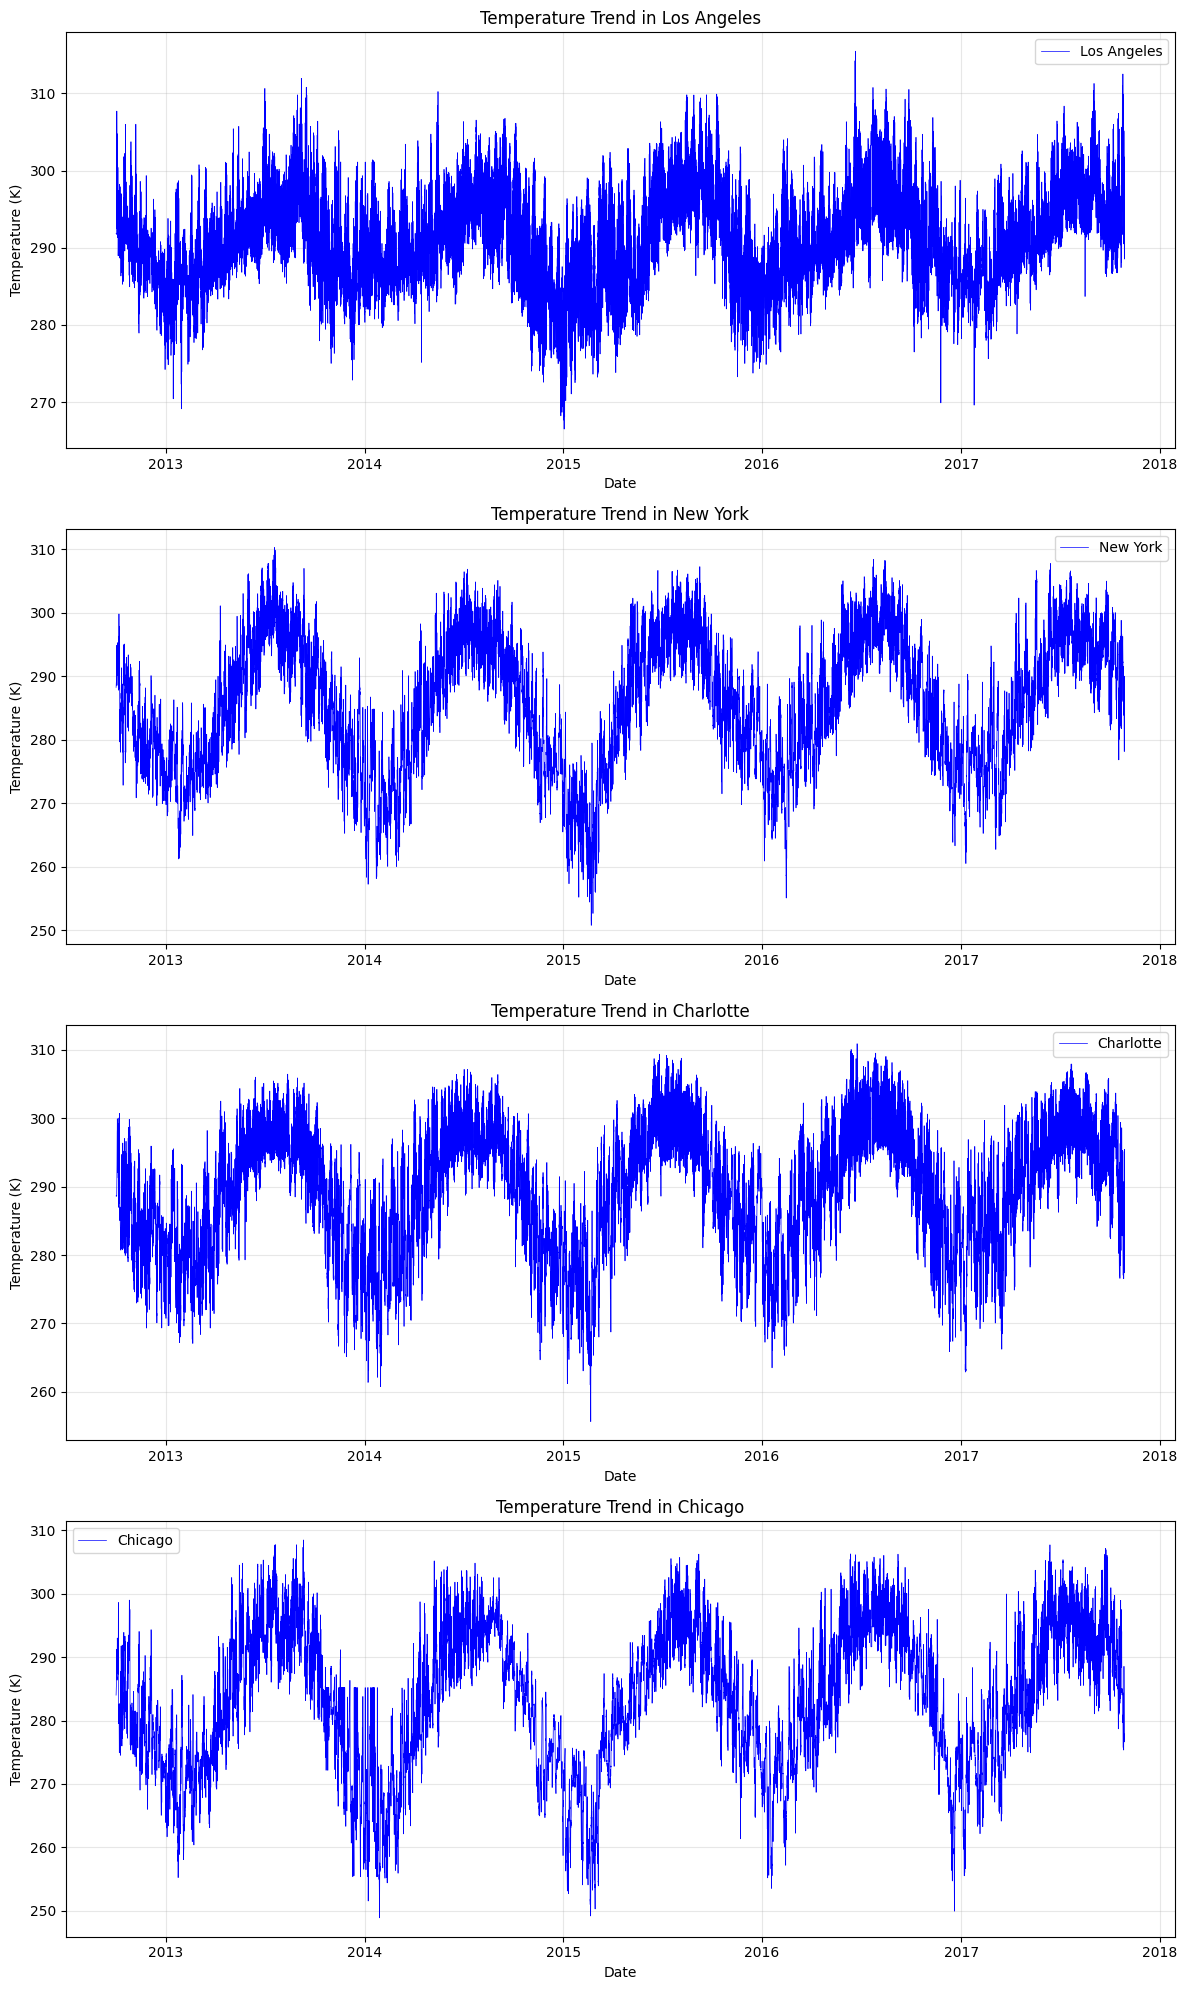

In [66]:
# Depict temperature trends over time for each city
import matplotlib.pyplot as plt

# First create a combined plot with all cities to compare
plt.figure(figsize=(12, 6))
for city in df.columns:
    plt.plot(df.index, df[city], label=city, linewidth=0.5)
plt.title('Temperature Trends - All Cities', fontsize=12)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Temperature (K)', fontsize=10)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# Then create individual subplots to analyse individually
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 20))

# Plot temperature trends for each city with thinner lines and grid
for i, city in enumerate(df.columns):
    axes[i].plot(df.index, df[city], label=city, linewidth=0.5, color="blue")
    axes[i].set_title(f'Temperature Trend in {city}', fontsize=12)
    axes[i].set_xlabel('Date', fontsize=10)
    axes[i].set_ylabel('Temperature (K)', fontsize=10)
    axes[i].grid(True, alpha=0.3)
    axes[i].legend(fontsize=10)

plt.tight_layout()
plt.show()




# 3. Correlation Analysis

In [67]:
# correlation analysis between each city's temperature data 
corr_matrix = df.corr().round(4)
corr_matrix

,Los Angeles,New York,Charlotte,Chicago
Los Angeles,1.0000,0.6204,0.6180,0.5938
New York,0.6204,1.0000,0.8934,0.8673
Charlotte,0.6180,0.8934,1.0000,0.8147
Chicago,0.5938,0.8673,0.8147,1.0000


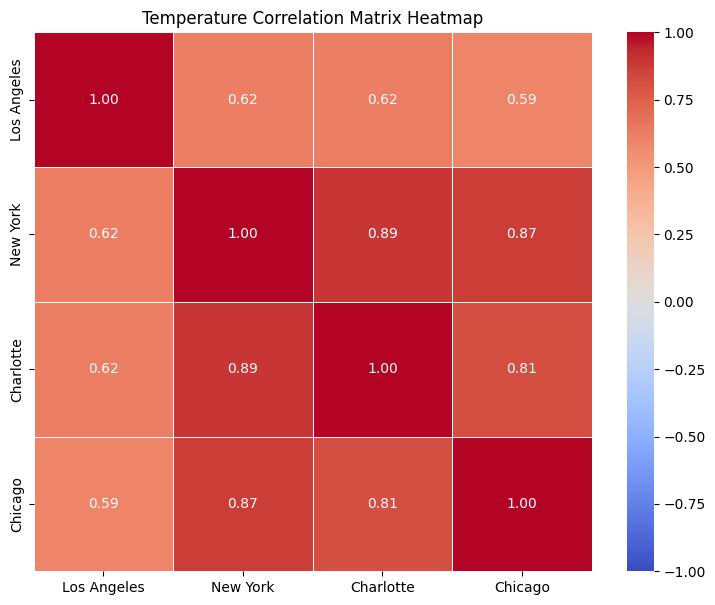

In [68]:
import seaborn as sns

# plot the correlation matrix as a heatmap
plt.figure(figsize=(9,7))
plt.title("Temperature Correlation Matrix Heatmap")
sns.heatmap(corr_matrix, 
            cmap ='coolwarm', 
            center=0, 
            vmin=-1, 
            vmax=1, 
            annot=True, 
            fmt='.2f',
            linewidth=0.5
            )
plt.show()

### Extra Analysis
#### test the correlation between distance and temperature correlation

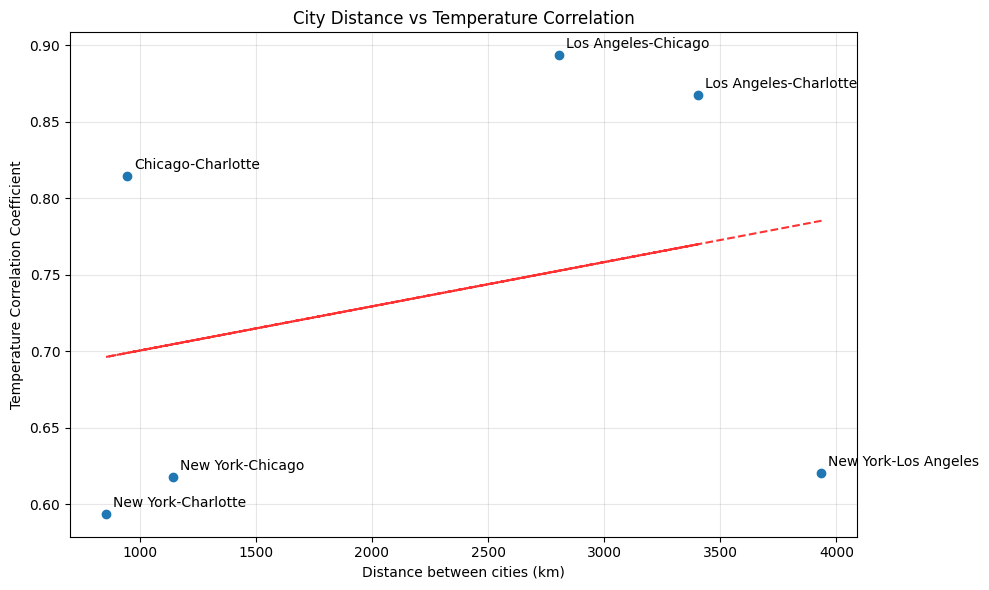

Correlation between distance and temperature correlation: 0.285
P-value: 0.584
Distance Matrix (km):


,New York,Los Angeles,Chicago,Charlotte
New York,0.000000,3935.746255,1144.291274,854.598300
Los Angeles,3935.746255,0.000000,2803.971507,3403.778782
Chicago,1144.291274,2803.971507,0.000000,945.483879
Charlotte,854.598300,3403.778782,945.483879,0.000000


In [69]:
import numpy as np
from scipy import stats

# test the correlation between distance and temperature correlation
# define city coordinates (latitude, longitude)
city_coords = {
    'New York': (40.7128, -74.0060),
    'Los Angeles': (34.0522, -118.2437),
    'Chicago': (41.8781, -87.6298),
    'Charlotte': (35.2271, -80.8431)
}

# Calculate distance matrix (in km)
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # earth's radius in km
    
    # Convert to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    return R * c

# create distance matrix
cities = list(city_coords.keys())
distances = np.zeros((len(cities), len(cities)))

for i, city1 in enumerate(cities):
    for j, city2 in enumerate(cities):
        lat1, lon1 = city_coords[city1]
        lat2, lon2 = city_coords[city2]
        distances[i,j] = haversine_distance(lat1, lon1, lat2, lon2)

distance_df = pd.DataFrame(distances, index=cities, columns=cities)

# store the correlation matrix
correlation_matrix = df.corr()

# Convert matrices to 1D arrays for plotting
dist_array = []
corr_array = []

for i in range(len(cities)):
    for j in range(i+1, len(cities)):
        dist_array.append(distances[i,j])
        corr_array.append(correlation_matrix.iloc[i,j])

# Calculate correlation between distance and temperature correlation
correlation = stats.pearsonr(dist_array, corr_array)

# visualise the relationship
plt.figure(figsize=(10, 6))
plt.scatter(dist_array, corr_array)
plt.xlabel('Distance between cities (km)')
plt.ylabel('Temperature Correlation Coefficient')
plt.title('City Distance vs Temperature Correlation')

# Add trend line
z = np.polyfit(dist_array, corr_array, 1)
p = np.poly1d(z)
plt.plot(dist_array, p(dist_array), "r--", alpha=0.8)

# Add pairwise city labels
for i in range(len(dist_array)):
    idx1, idx2 = np.where(np.isclose(distances, dist_array[i]))
    if len(idx1) > 0:
        city_pair = f"{cities[idx1[0]]}-{cities[idx2[0]]}"
        plt.annotate(city_pair, (dist_array[i], corr_array[i]), 
                    xytext=(5, 5), textcoords='offset points')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print results
print(f"Correlation between distance and temperature correlation: {correlation[0]:.3f}")
print(f"P-value: {correlation[1]:.3f}")

print("Distance Matrix (km):")
distance_df



# 4. Identifying Extremes

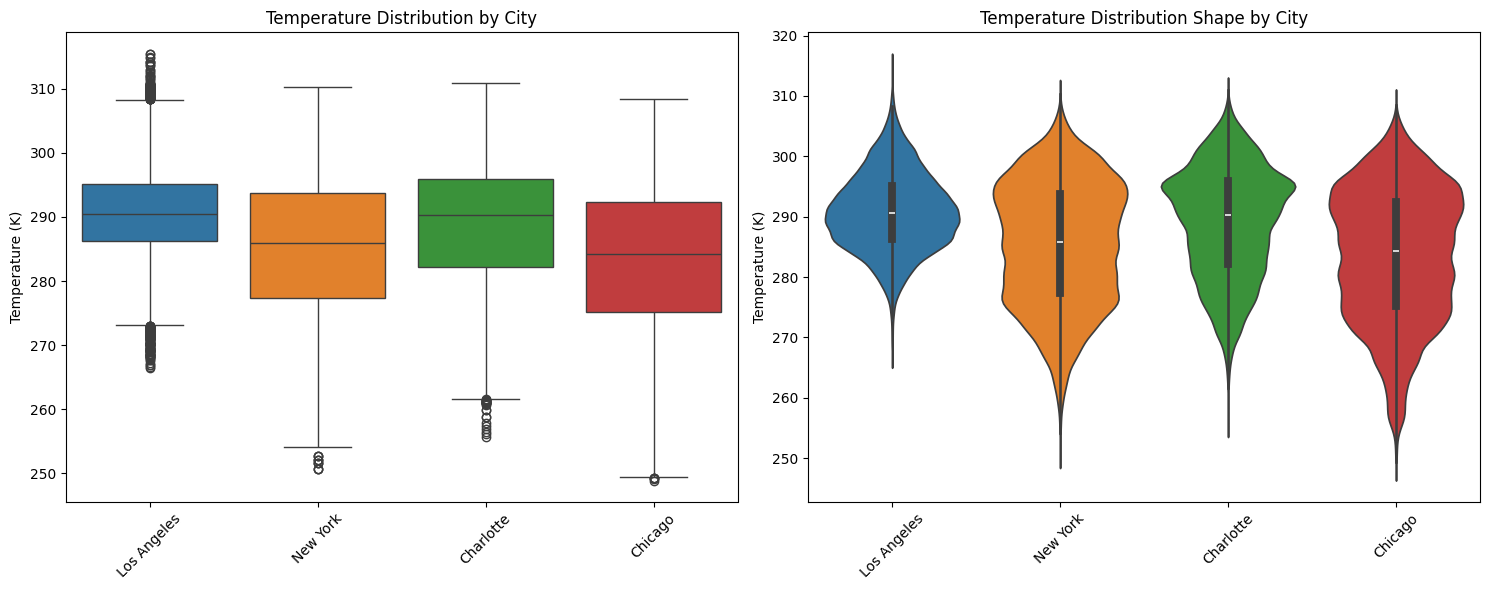

Summary Statistics (sorted by variability):
               Mean  Std Dev     Min     Max  Range  25th Percentile  \
Los Angeles  290.84     6.50  266.50  315.47  48.97           286.33   
Charlotte    289.00     9.15  255.66  310.90  55.24           282.15   
New York     285.40    10.22  250.77  310.24  59.47           277.37   
Chicago      283.45    11.05  248.89  308.48  59.59           275.20   

             75th Percentile    IQR  
Los Angeles           295.13   8.80  
Charlotte             295.85  13.70  
New York              293.76  16.39  
Chicago               292.41  17.21  


In [70]:
import seaborn as sns

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Box plot to show distribution and extremes
sns.boxplot(data=df, ax=ax1)
ax1.set_title('Temperature Distribution by City')
ax1.set_ylabel('Temperature (K)')
ax1.tick_params(axis='x', rotation=45)

# 2. Violin plot to show full distribution shape
sns.violinplot(data=df, ax=ax2)
ax2.set_title('Temperature Distribution Shape by City')
ax2.set_ylabel('Temperature (K)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Calculate summary statistics
summary_stats = pd.DataFrame({
    'Mean': df.mean(),
    'Std Dev': df.std(),
    'Min': df.min(),
    'Max': df.max(),
    'Range': df.max() - df.min(),
    '25th Percentile': df.quantile(0.25),
    '75th Percentile': df.quantile(0.75),
    'IQR': df.quantile(0.75) - df.quantile(0.25)
}).round(2)

# Sort cities by standard deviation to see which has most variability
summary_stats_sorted = summary_stats.sort_values('Std Dev', ascending=True)

print("Summary Statistics (sorted by variability):")
print(summary_stats_sorted)


# 5. Hypothesis Testing

In [35]:
from scipy import stats

# perform a t-test between ny and charlotte
df_ny_charlotte = df[["New York", "Charlotte"]]

t, p = stats.ttest_ind(df_ny_charlotte['New York'], df_ny_charlotte['Charlotte'])

df1 = len(df_ny_charlotte['New York']) + len(df_ny_charlotte['Charlotte']) - 2

print(f't({df1}) = {t:.2f}, p = {p:.3f}')

ic| df_ny_charlotte.isna().sum(): New York     0
                                  Charlotte    0
                                  dtype

: int64


t(88918) = -55.26, p = 0.000
